Hasil pengujian telah disimpan ke hasil evaluasi.xlsx
Parameter terbaik ditemukan pada:
Train/Test Ratio: 0.9
Hidden Neurons: 1.0
MAPE: 232.8395265778002
MAE: 0.04428045812186659
MSE: 0.008733839479758468


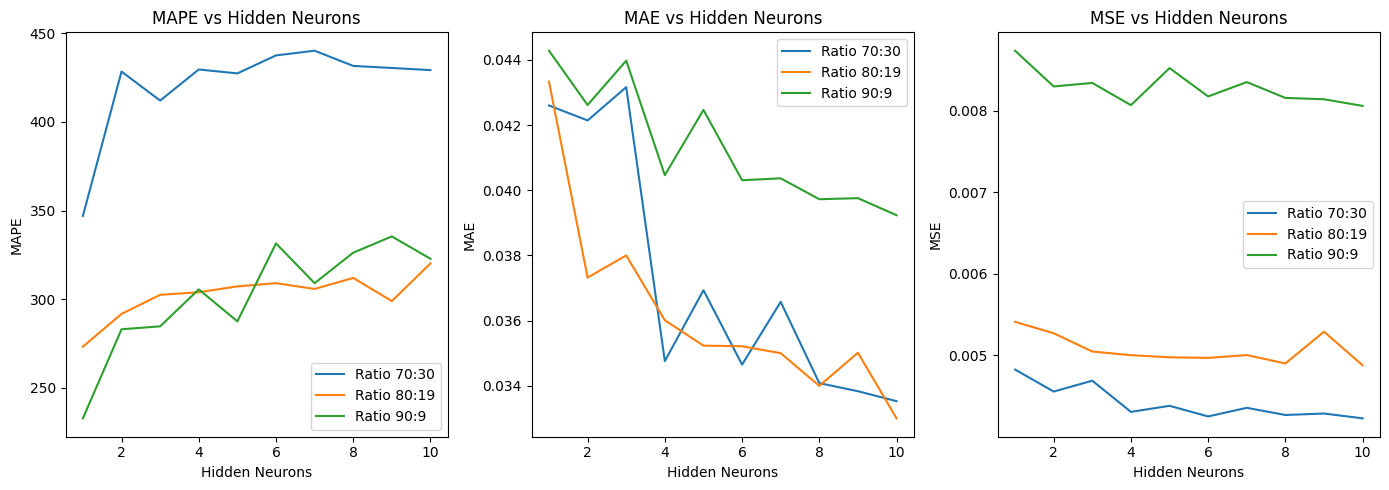

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from hpelm import ELM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Load dataset dari file Excel
data = pd.read_excel('data.xlsx', parse_dates=['Tanggal'])

# 2. Membersihkan data
data['Curah Hujan (RR)'] = data['Curah Hujan (RR)'].replace(8888, 0)
data['Curah Hujan (RR)'] = data['Curah Hujan (RR)'].fillna(0)

# Normalisasi data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Curah Hujan (RR)']])

# 3. Membuat dataset untuk time series (lagged data)
def create_dataset(data, lag=1):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        y.append(data[i + lag, 0])
    return np.array(X), np.array(y)

lag = 7
X, y = create_dataset(data_scaled, lag)

# Fungsi untuk pengujian berbagai rasio latih dan uji serta hidden neuron
def run_experiment(X, y, hidden_neurons_range, train_test_ratios):
    results = []
    for ratio in train_test_ratios:
        train_size = int(len(X) * ratio)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        
        for hidden_neurons in hidden_neurons_range:
            # 4. Membuat Model ELM
            elm = ELM(X_train.shape[1], 1)
            elm.add_neurons(hidden_neurons, 'sigm')
            elm.train(X_train, y_train, 'r')

            # 5. Prediksi
            y_pred_test = elm.predict(X_test)
            
            # 6. Evaluasi dengan MAPE, MAE, dan MSE
            error_mape = safe_mape(y_test, y_pred_test)  # Menggunakan safe_mape
            error_mae = mean_absolute_error(y_test, y_pred_test)
            error_mse = mean_squared_error(y_test, y_pred_test)
            
            # Simpan hasilnya
            results.append({
                'Train/Test Ratio': ratio,
                'Hidden Neurons': hidden_neurons,
                'MAPE': error_mape,  # Simpan sebagai desimal
                'MAE': error_mae,
                'MSE': error_mse
            })
    
    return pd.DataFrame(results)

# Fungsi untuk menghitung MAPE dengan aman (menghindari pembagian dengan nol)
def safe_mape(y_true, y_pred):
    mask = y_true != 0  # Hanya menghitung MAPE ketika nilai y_true tidak nol
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100)  # Kembali ke format desimal

# Skenario Pengujian
hidden_neurons_range = range(1, 11)  # Hidden neuron dari 1 hingga 10
train_test_ratios = [0.7, 0.8, 0.9]  # Rasio latih dan uji 70:30, 80:20, 90:10

# Menjalankan eksperimen
results = run_experiment(X, y, hidden_neurons_range, train_test_ratios)

# Menyimpan hasil pengujian ke dalam file Excel
output_excel = "hasil evaluasi.xlsx"
results.to_excel(output_excel, index=False)

print(f"Hasil pengujian telah disimpan ke {output_excel}")

# 9. Mencari parameter terbaik (berdasarkan MAPE terkecil)
best_result = results.loc[results['MAPE'].idxmin()]  # Ambil yang terendah

# Menampilkan parameter terbaik
print(f"Parameter terbaik ditemukan pada:")
print(f"Train/Test Ratio: {best_result['Train/Test Ratio']}")
print(f"Hidden Neurons: {best_result['Hidden Neurons']}")
print(f"MAPE: {best_result['MAPE']}")  # Tampilkan MAPE sebagai desimal
print(f"MAE: {best_result['MAE']}")
print(f"MSE: {best_result['MSE']}")

# 7. Visualisasi hasil MAPE, MAE, dan MSE
plt.figure(figsize=(14, 5))

# Plot MAPE
plt.subplot(1, 3, 1)
for ratio in train_test_ratios:
    subset = results[results['Train/Test Ratio'] == ratio]
    plt.plot(subset['Hidden Neurons'], subset['MAPE'], label=f"Ratio {int(ratio*100)}:{int((1-ratio)*100)}")
plt.xlabel('Hidden Neurons')
plt.ylabel('MAPE')
plt.title('MAPE vs Hidden Neurons')
plt.legend()

# Plot MAE
plt.subplot(1, 3, 2)
for ratio in train_test_ratios:
    subset = results[results['Train/Test Ratio'] == ratio]
    plt.plot(subset['Hidden Neurons'], subset['MAE'], label=f"Ratio {int(ratio*100)}:{int((1-ratio)*100)}")
plt.xlabel('Hidden Neurons')
plt.ylabel('MAE')
plt.title('MAE vs Hidden Neurons')
plt.legend()

# Plot MSE
plt.subplot(1, 3, 3)
for ratio in train_test_ratios:
    subset = results[results['Train/Test Ratio'] == ratio]
    plt.plot(subset['Hidden Neurons'], subset['MSE'], label=f"Ratio {int(ratio*100)}:{int((1-ratio)*100)}")
plt.xlabel('Hidden Neurons')
plt.ylabel('MSE')
plt.title('MSE vs Hidden Neurons')
plt.legend()

plt.tight_layout()
plt.show()

Bulan terakhir pada data: 6
Ringkasan Prediksi Bulanan:
    Bulan  Curah Hujan (RR) Prediksi
0       1                 153.322382
1       2                 155.199594
2       3                 150.193157
3       4                 155.199596
4       5                 150.193157
5       6                 155.199596
6       7                 155.199596
7       8                 140.180280
8       9                 155.199596
9      10                 150.193157
10     11                 155.199596
11     12                 150.193157


C:\Users\ndah\AppData\Local\Temp\ipykernel_61660\2955559995.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = pred  # Masukkan prediksi ke input


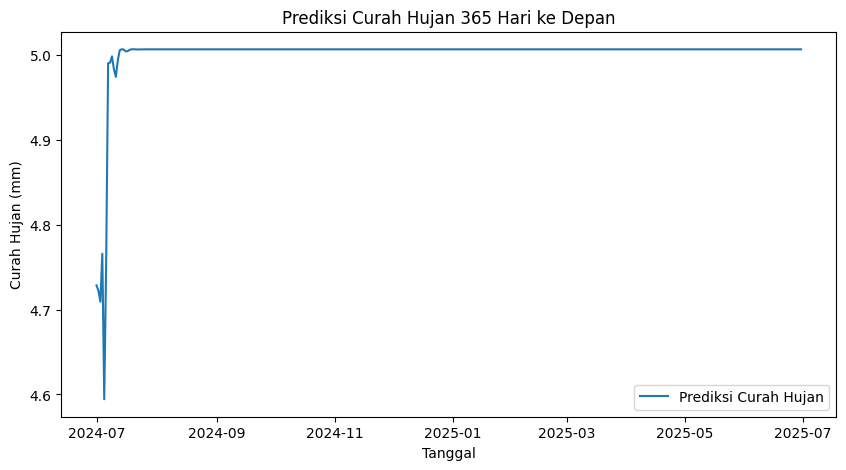

In [17]:
# Mencari parameter terbaik (berdasarkan MAPE terkecil)
best_result = results.loc[results['MAPE'].idxmin()]
hidden_neurons_best = int(best_result['Hidden Neurons'])  # Pastikan menjadi integer

# 4. Membuat Model ELM dengan parameter terbaik
elm = ELM(X.shape[1], 1)
elm.add_neurons(hidden_neurons_best, 'sigm')
elm.train(X, y)  # Latih model dengan seluruh dataset

# 5. Prediksi 365 hari ke depan
# Buat array untuk menyimpan prediksi
predictions = []
current_input = data_scaled[-lag:].flatten()  # Mengambil data terakhir untuk prediksi

for _ in range(365):
    # Prediksi
    pred = elm.predict(current_input.reshape(1, -1))
    predictions.append(pred[0][0])
    
    # Update input dengan memasukkan prediksi terbaru
    current_input = np.roll(current_input, -1)  # Geser input
    current_input[-1] = pred  # Masukkan prediksi ke input

# 6. Balikkan normalisasi data
predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 7. Membuat DataFrame dari hasil prediksi
future_dates = pd.date_range(start=data['Tanggal'].max() + pd.Timedelta(days=1), periods=365)
predicted_df = pd.DataFrame({
    'Tanggal': future_dates,
    'Curah Hujan (RR) Prediksi': predictions_rescaled.flatten()
})

# 8. Mengelompokkan berdasarkan bulan untuk menentukan jadwal tanam padi
predicted_df['Bulan'] = predicted_df['Tanggal'].dt.month

# Dapatkan bulan dari tanggal terakhir pada dataset asli
last_month = data['Tanggal'].max().month

# Menggeser bulan sehingga dimulai dari bulan terakhir
predicted_df['Bulan'] = (predicted_df['Bulan'] + (last_month - 1)) % 12 + 1

# Tampilkan bulan terakhir
print(f"Bulan terakhir pada data: {last_month}")

monthly_summary = predicted_df.groupby('Bulan')['Curah Hujan (RR) Prediksi'].sum().reset_index()

# Tampilkan hasil ringkasan bulanan
print("Ringkasan Prediksi Bulanan:")
print(monthly_summary)

# 9. Visualisasi hasil prediksi
plt.figure(figsize=(10, 5))
plt.plot(predicted_df['Tanggal'], predicted_df['Curah Hujan (RR) Prediksi'], label="Prediksi Curah Hujan")
plt.title('Prediksi Curah Hujan 365 Hari ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.legend()
plt.show()

Bulan terakhir pada data: 6


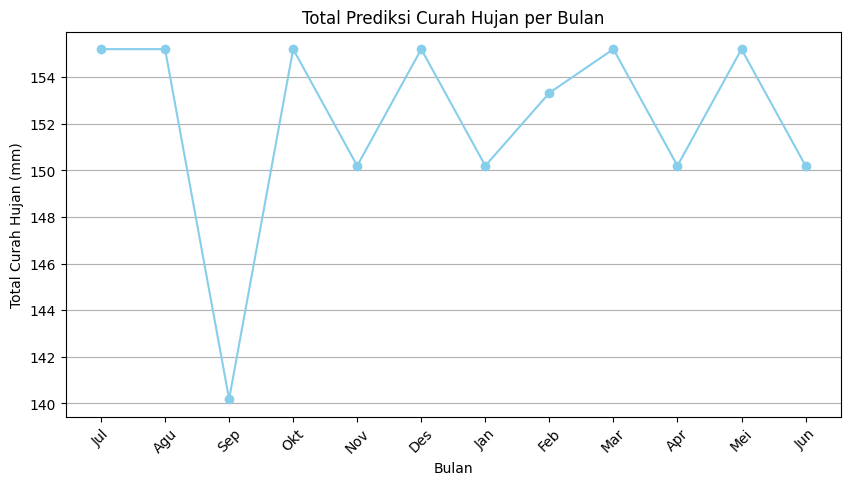

In [18]:
# Dapatkan bulan dari tanggal terakhir pada dataset asli
last_month = data['Tanggal'].max().month

# Menggeser bulan sehingga dimulai dari bulan terakhir + 1
predicted_df['Bulan'] = (predicted_df['Bulan'] + (last_month)) % 12 + 1

# Tampilkan bulan terakhir
print(f"Bulan terakhir pada data: {last_month}")

# 8. Mengelompokkan berdasarkan bulan untuk menentukan jadwal tanam padi
monthly_summary = predicted_df.groupby('Bulan')['Curah Hujan (RR) Prediksi'].sum().reset_index()

# 10. Visualisasi per bulan menggunakan grafik garis
plt.figure(figsize=(10, 5))
plt.plot(monthly_summary['Bulan'], monthly_summary['Curah Hujan (RR) Prediksi'], marker='o', color='skyblue', linestyle='-')
plt.title('Total Prediksi Curah Hujan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Curah Hujan (mm)')
plt.xticks(monthly_summary['Bulan'], ['Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des', 'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun'], rotation=45)
plt.grid(axis='y')
plt.show()